In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt


In [2]:
#upload de arquivo
#rom google.colab import files
#arq = files.upload()

In [36]:
#Importando Data Frame das queimadas registradas pelo Ibama
# http://dadosabertos.ibama.gov.br/dados/SISFOGO/ROI.csv
df = pd.read_csv('ROI.csv', sep=";", )
df.head()

,SEQ OCORRENCIA INCENDIO,NIVEL ACIONAMENTO,TIPO LOCALIDADE,LOCALIDADE,UF,MUNICIPIO,TIPO DETECCAO,DATA/HORA INICIO FOGO,DATA/HORA DETECCAO,DATA/HORA DESLOCAMENTO,DATA/HORA PRIMEIRO ATAQUE,DATA/HORA REFORCO,DATA/HORA CONTROLE INCENDIO,DATA/HORA EXTINCAO INCENDIO,FORMA EXTINCAO,PERICIA,NOME RESPONSAVEL,ANEXO,TIPO COMBATENTE,QTD COMBATENTE,ABORDAGEM,OUTROS PARTICIPANTES,QTD BRIGADISTA,UNIDADE IBAMA BRIGADA,FERRAMENTA,QTD AEREO,UNIDADE IBAMA INCENDIO,HORA VOO,TIPO ITEM,PROVAVEL CAUSA,VEGETACAO ATINGIDA,TIPO AREA,DENTRO ENTORNO,QTD AREA ATINGIDA,METODO CALCULO,DIFICULDADE ENCONTRADA,OBSERVACAO,ARQUIVO
0,12142,Nível 1,UNIDADE DE CONSERVAÇÃO,FLONA DE BRASÍLIA,DF,BRASILIA,TELEFONE,28/08/2017 12:08:00,28/08/2017 13:08:00,NaN,28/08/2017 13:08:00,28/08/2017 16:08:00,28/08/2017 23:08:00,28/08/2017 23:08:00,Combate direto,Não,NaN,NaN,SERVIDOR LOCAL,3.0,1º Ataque,Tiro quente BRASILIA-DF,13.0,CENTRO ESPECIALIZADO PREVFOGO,Avião Tanque,1.0,-CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL,200.0,ATIVIDADE AGROPECUÁRIA,QUEIMA DE LIXO,PASTAGEM NATIVA OU CAMPO LIMPO,Área Protegida,Dentro,NaN,Estimativa Visual,Material combustiveu muito alto e omogenio.,NaN,Flona incendio.png
1,12142,Nível 1,UNIDADE DE CONSERVAÇÃO,FLONA DE BRASÍLIA,DF,BRASILIA,TELEFONE,28/08/2017 12:08:00,28/08/2017 13:08:00,NaN,28/08/2017 13:08:00,28/08/2017 16:08:00,28/08/2017 23:08:00,28/08/2017 23:08:00,Combate direto,Não,NaN,NaN,SERVIDOR LOCAL,3.0,1º Ataque,Tiro quente BRASILIA-DF,13.0,CENTRO ESPECIALIZADO PREVFOGO,Avião Tanque,1.0,-CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL,200.0,ATIVIDADE AGROPECUÁRIA,QUEIMA DE LIXO,"BREJO, VÁRZEA OU VEREDA",Área Protegida,Dentro,NaN,GPS,Material combustiveu muito alto e omogenio.,NaN,Flona incendio.png
2,12142,Nível 1,UNIDADE DE CONSERVAÇÃO,FLONA DE BRASÍLIA,DF,BRASILIA,TELEFONE,28/08/2017 12:08:00,28/08/2017 13:08:00,NaN,28/08/2017 13:08:00,28/08/2017 16:08:00,28/08/2017 23:08:00,28/08/2017 23:08:00,Combate direto,Não,NaN,NaN,BRIGADISTA LOCAL,6.0,Controle,Tiro quente BRASILIA-DF,13.0,CENTRO ESPECIALIZADO PREVFOGO,Avião Tanque,1.0,-CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL,200.0,ATIVIDADE AGROPECUÁRIA,QUEIMA DE LIXO,VEGETAÇÃO ARBUSTIVA,Área Protegida,Dentro,NaN,Estimativa Visual,Material combustiveu muito alto e omogenio.,NaN,Flona incendio.png
3,12142,Nível 1,UNIDADE DE CONSERVAÇÃO,FLONA DE BRASÍLIA,DF,BRASILIA,TELEFONE,28/08/2017 12:08:00,28/08/2017 13:08:00,NaN,28/08/2017 13:08:00,28/08/2017 16:08:00,28/08/2017 23:08:00,28/08/2017 23:08:00,Combate direto,Não,NaN,NaN,BRIGADISTA LOCAL,6.0,Controle,Tiro quente BRASILIA-DF,13.0,CENTRO ESPECIALIZADO PREVFOGO,Avião Tanque,1.0,-CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL,200.0,ATIVIDADE AGROPECUÁRIA,QUEIMA DE LIXO,FLORESTA CULTIVADA,Área Protegida,Dentro,NaN,Imagem de Satélite,Material combustiveu muito alto e omogenio.,NaN,Flona incendio.png
4,12142,Nível 1,UNIDADE DE CONSERVAÇÃO,FLONA DE BRASÍLIA,DF,BRASILIA,TELEFONE,28/08/2017 12:08:00,28/08/2017 13:08:00,NaN,28/08/2017 13:08:00,28/08/2017 16:08:00,28/08/2017 23:08:00,28/08/2017 23:08:00,Combate direto,Não,NaN,NaN,BOMBEIROS,60.0,Extinção,Tiro quente BRASILIA-DF,13.0,CENTRO ESPECIALIZADO PREVFOGO,Avião Tanque,1.0,-CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL,200.0,ATIVIDADE AGROPECUÁRIA,QUEIMA DE LIXO,MATA OU FLORESTA NATIVA,Área Protegida,Dentro,NaN,Imagem de Satélite,Material combustiveu muito alto e omogenio.,NaN,Flona incendio.png


In [37]:
#Verificar as últimas linhas
df.tail()

,SEQ OCORRENCIA INCENDIO,NIVEL ACIONAMENTO,TIPO LOCALIDADE,LOCALIDADE,UF,MUNICIPIO,TIPO DETECCAO,DATA/HORA INICIO FOGO,DATA/HORA DETECCAO,DATA/HORA DESLOCAMENTO,DATA/HORA PRIMEIRO ATAQUE,DATA/HORA REFORCO,DATA/HORA CONTROLE INCENDIO,DATA/HORA EXTINCAO INCENDIO,FORMA EXTINCAO,PERICIA,NOME RESPONSAVEL,ANEXO,TIPO COMBATENTE,QTD COMBATENTE,ABORDAGEM,OUTROS PARTICIPANTES,QTD BRIGADISTA,UNIDADE IBAMA BRIGADA,FERRAMENTA,QTD AEREO,UNIDADE IBAMA INCENDIO,HORA VOO,TIPO ITEM,PROVAVEL CAUSA,VEGETACAO ATINGIDA,TIPO AREA,DENTRO ENTORNO,QTD AREA ATINGIDA,METODO CALCULO,DIFICULDADE ENCONTRADA,OBSERVACAO,ARQUIVO
416947,14477,Nível 1,TERRA INDÍGENA,SORORÓ,PA,SAO GERALDO DO ARAGUAIA,MORADOR DO ENTORNO,01/10/2017 07:10:00,02/10/2017 08:10:00,NaN,03/10/2017 07:10:00,NaN,27/10/2017 21:10:00,28/10/2017 13:10:00,Combate direto,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATIVIDADE AGROPECUÁRIA,LIMPEZA DE ÁREA PARA CULTIVO,MATA OU FLORESTA NATIVA,Área Protegida,Dentro,NaN,Estimativa Visual,NaN,Est. de área queimada: 1.000ha.,NaN
416948,5562,Nível 1,COMUNIDADE TRADICIONAL,Quilombo Kalunga,GO,CAVALCANTE,RONDA,13/07/2016 09:07:00,13/07/2016 14:07:00,13/07/2016 14:07:00,13/07/2016 14:07:00,NaN,13/07/2016 17:07:00,13/07/2016 17:07:00,Combate direto,Não,Damião Moreira Chefe de brigada Kalunga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATIVIDADE AGROPECUÁRIA,RENOVAÇÃO DE PASTAGEM NATURAL,PASTAGEM NATIVA OU CAMPO LIMPO,Outras Áreas,NaN,50,Estimativa Visual,nenhuma,"Próximo a primeira sede da faz. Pequi, coorden...",NaN
416949,13034,Nível 1,TERRA INDÍGENA,LAS CASAS,PA,PAU D'ARCO,RONDA,12/08/2017 08:08:00,12/08/2017 09:08:00,NaN,12/08/2017 13:08:00,NaN,12/08/2017 15:08:00,12/08/2017 16:08:00,Combate direto,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUTRAS CAUSAS,INDETERMINADO,ÁREA DEGRADADA OU CAPOEIRA,Área Protegida,Dentro,NaN,Estimativa Visual,NaN,Aldeia Rôneko-re. Área atingida: 21 ha.,NaN
416950,13034,Nível 1,TERRA INDÍGENA,LAS CASAS,PA,PAU D'ARCO,RONDA,12/08/2017 08:08:00,12/08/2017 09:08:00,NaN,12/08/2017 13:08:00,NaN,12/08/2017 15:08:00,12/08/2017 16:08:00,Combate direto,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUTRAS CAUSAS,INDETERMINADO,"BREJO, VÁRZEA OU VEREDA",Área Protegida,Dentro,NaN,Estimativa Visual,NaN,Aldeia Rôneko-re. Área atingida: 21 ha.,NaN
416951,13436,Nível 1,TERRA INDÍGENA,PARQUE DO ARAGUAIA,TO,FORMOSO DO ARAGUAIA,RONDA,01/09/2017 16:09:00,01/09/2017 17:09:00,01/09/2017 17:09:00,01/09/2017 17:09:00,01/09/2017 17:09:00,01/09/2017 20:09:00,02/09/2017 07:09:00,Combate direto,Não,viviano iesouru javaé karajá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PASTAGEM NATIVA OU CAMPO LIMPO,Área Protegida,NaN,NaN,NaN,muito morro de cupim,no ato do combate os brigadista emfrentaram mu...,NaN


In [38]:
# Amostras aleátorias de dados
df.sample(10)

,SEQ OCORRENCIA INCENDIO,NIVEL ACIONAMENTO,TIPO LOCALIDADE,LOCALIDADE,UF,MUNICIPIO,TIPO DETECCAO,DATA/HORA INICIO FOGO,DATA/HORA DETECCAO,DATA/HORA DESLOCAMENTO,DATA/HORA PRIMEIRO ATAQUE,DATA/HORA REFORCO,DATA/HORA CONTROLE INCENDIO,DATA/HORA EXTINCAO INCENDIO,FORMA EXTINCAO,PERICIA,NOME RESPONSAVEL,ANEXO,TIPO COMBATENTE,QTD COMBATENTE,ABORDAGEM,OUTROS PARTICIPANTES,QTD BRIGADISTA,UNIDADE IBAMA BRIGADA,FERRAMENTA,QTD AEREO,UNIDADE IBAMA INCENDIO,HORA VOO,TIPO ITEM,PROVAVEL CAUSA,VEGETACAO ATINGIDA,TIPO AREA,DENTRO ENTORNO,QTD AREA ATINGIDA,METODO CALCULO,DIFICULDADE ENCONTRADA,OBSERVACAO,ARQUIVO
413723,23069,Nível 2,UNIDADE DE CONSERVAÇÃO,PARQUE NATURAL MUNICIPAL DE ANDARAÍ ROTA DAS C...,BA,ANDARAI,PONTO DE OBSERVAÇÃO,06/10/2020 08:10:00,06/10/2020 08:10:00,06/10/2020 08:10:00,06/10/2020 09:10:00,06/10/2020 09:10:00,11/10/2020 09:10:00,12/10/2020 18:10:00,Combate direto,Sim,Rejane Carneiro Salvador de Oliveira,23484.0,BOMBEIROS,45.0,Extinção,Brigada Voluntária do Brejão/Ibicoara,8.0,ORGANIZAÇÃO DA SOCIEDADE CIVIL,Helicóptero,1.0,BATALHÃO DE POLÍCIA MILITAR DE OPERAÇÕES AÉREA...,NaN,OUTRAS CAUSAS,INDETERMINADO,VEGETAÇÃO ARBUSTIVA,Área Protegida,Dentro,"1786,02",Imagem de Satélite,NaN,"Coordenadas Geográficas: 12°56'42.1"" S 41°17'...",Mapa_cicatriz de fogo_10-10-2020.pdf
326854,23069,Nível 2,UNIDADE DE CONSERVAÇÃO,PARNA DA CHAPADA DIAMANTINA,BA,MUCUGE,PONTO DE OBSERVAÇÃO,06/10/2020 08:10:00,06/10/2020 08:10:00,06/10/2020 08:10:00,06/10/2020 09:10:00,06/10/2020 09:10:00,11/10/2020 09:10:00,12/10/2020 18:10:00,Combate Indireto,Sim,Pablo Lacaze de Camargo Casella,23484.0,SERVIDOR DE OUTRAS INSTITUIÇÕES,89.0,Extinção,Brigada Voluntária de Igatu,12.0,ORGANIZAÇÃO DA SOCIEDADE CIVIL,Helicóptero,1.0,BATALHÃO DE POLÍCIA MILITAR DE OPERAÇÕES AÉREA...,NaN,OUTRAS CAUSAS,INDETERMINADO,VEGETAÇÃO ARBUSTIVA,Área Protegida,Entorno,"2970,46",Imagem de Satélite,NaN,"Coordenadas Geográficas: 12°56'42.1"" S 41°17'...",Mapa_cicatriz de fogo_10-10-2020.pdf
57299,23069,Nível 2,UNIDADE DE CONSERVAÇÃO,PARNA DA CHAPADA DIAMANTINA,BA,MUCUGE,PONTO DE OBSERVAÇÃO,06/10/2020 08:10:00,06/10/2020 08:10:00,06/10/2020 08:10:00,06/10/2020 09:10:00,06/10/2020 09:10:00,11/10/2020 09:10:00,12/10/2020 18:10:00,Combate Indireto,Sim,Rejane Carneiro Salvador de Oliveira,23484.0,DEFESA CIVIL,5.0,Extinção,ICMBio,40.0,PARQUE NACIONAL CHAPADA DIAMANTINA/BA,Helicóptero,1.0,BATALHÃO DE POLÍCIA MILITAR DE OPERAÇÕES AÉREA...,NaN,OUTRAS CAUSAS,INDETERMINADO,VEGETAÇÃO ARBUSTIVA,Área Protegida,Dentro,"400,85",Imagem de Satélite,NaN,"Coordenadas Geográficas: 12°56'42.1"" S 41°17'...",Mapa_cicatriz de fogo_10-10-2020.pdf
388720,23069,Nível 2,UNIDADE DE CONSERVAÇÃO,PARNA DA CHAPADA DIAMANTINA,BA,ANDARAI,PONTO DE OBSERVAÇÃO,06/10/2020 08:10:00,06/10/2020 08:10:00,06/10/2020 08:10:00,06/10/2020 09:10:00,06/10/2020 09:10:00,11/10/2020 09:10:00,12/10/2020 18:10:00,Extinção Natural,Sim,Rejane Carneiro Salvador de Oliveira,23484.0,DEFESA CIVIL,5.0,Controle,Bombeiro civil,4.0,ORGANIZAÇÃO DA SOCIEDADE CIVIL,Helicóptero,1.0,BATALHÃO DE POLÍCIA MILITAR DE OPERAÇÕES AÉREA...,NaN,OUTRAS CAUSAS,INDETERMINADO,VEGETAÇÃO ARBUSTIVA,Área Protegida,Dentro,"400,85",Imagem de Satélite,NaN,"Coordenadas Geográficas: 12°56'42.1"" S 41°17'...",NI 02_Operação Chapada Diamantina 2020.pdf
314548,23069,Nível 2,UNIDADE DE CONSERVAÇÃO,PARQUE NATURAL MUNICIPAL DE ANDARAÍ ROTA DAS C...,BA,ANDARAI,PONTO DE OBSERVAÇÃO,06/10/2020 08:10:00,06/10/2020 08:10:00,06/10/2020 08:10:00,06/10/2020 09:10:00,06/10/2020 09:10:00,11/10/2020 09:10:00,12/10/2020 18:10:00,Combate Indireto,Sim,Pablo Lacaze de Camargo Casella,23484.0,DEFESA CIVIL,5.0,Controle,Brigada Voluntária de Abaíra - BVA,6.0,ORGANIZAÇÃO DA SOCIEDADE CIVIL,Helicóptero,1.0,BATALHÃO DE POLÍCIA MILITAR DE OPERAÇÕES AÉREA...,NaN,OUTRAS CAUSAS,INDETERMINADO,MATA OU FLORESTA NATIVA,Área Protegida,Dentro,"400,85",Imagem de Satélite,NaN,"Coordenadas Geográficas: 12°56'42.1"" S 41°17'...",NI 02_Operação Chapada Diamantina 2020.pdf
224387,17332,Nível 1,PROJETO DE ASSENTAMENTO

In [39]:
#Tipos de dados
df.dtypes

SEQ OCORRENCIA INCENDIO          int64
NIVEL ACIONAMENTO               object
TIPO LOCALIDADE                 object
LOCALIDADE                      object
UF                              object
MUNICIPIO                       object
TIPO DETECCAO                   object
DATA/HORA INICIO FOGO           object
DATA/HORA DETECCAO              object
DATA/HORA DESLOCAMENTO          object
DATA/HORA PRIMEIRO ATAQUE       object
DATA/HORA REFORCO               object
DATA/HORA CONTROLE INCENDIO     object
DATA/HORA EXTINCAO INCENDIO     object
FORMA EXTINCAO                  object
PERICIA                         object
NOME RESPONSAVEL                object
ANEXO                          float64
TIPO COMBATENTE                 object
QTD COMBATENTE                 float64
ABORDAGEM                       object
OUTROS PARTICIPANTES            object
QTD BRIGADISTA                 float64
UNIDADE IBAMA BRIGADA           object
FERRAMENTA                      object
QTD AEREO                

In [40]:
#Convertendo as datas para manipulação futura
df['DATA/HORA CONTROLE INCENDIO'] = pd.to_datetime(df['DATA/HORA CONTROLE INCENDIO'], format= '%d/%m/%Y %H:%M:%S')
df['DATA/HORA INICIO FOGO'] = pd.to_datetime(df['DATA/HORA INICIO FOGO'], dayfirst=True, errors = 'coerce')
df['DATA/HORA DETECCAO'] = pd.to_datetime(df['DATA/HORA DETECCAO'],dayfirst=True)
df['DATA/HORA DESLOCAMENTO'] = pd.to_datetime(df['DATA/HORA DESLOCAMENTO'], format= '%d/%m/%Y %H:%M:%S')
df['DATA/HORA PRIMEIRO ATAQUE'] = pd.to_datetime(df['DATA/HORA PRIMEIRO ATAQUE'], format= '%d/%m/%Y %H:%M:%S')
df['DATA/HORA REFORCO'] = pd.to_datetime(df['DATA/HORA REFORCO'], format= '%d/%m/%Y %H:%M:%S')
df['DATA/HORA EXTINCAO INCENDIO'] = pd.to_datetime(df['DATA/HORA EXTINCAO INCENDIO'], dayfirst=True, errors='coerce')

df.dtypes

SEQ OCORRENCIA INCENDIO                 int64
NIVEL ACIONAMENTO                      object
TIPO LOCALIDADE                        object
LOCALIDADE                             object
UF                                     object
MUNICIPIO                              object
TIPO DETECCAO                          object
DATA/HORA INICIO FOGO          datetime64[ns]
DATA/HORA DETECCAO             datetime64[ns]
DATA/HORA DESLOCAMENTO         datetime64[ns]
DATA/HORA PRIMEIRO ATAQUE      datetime64[ns]
DATA/HORA REFORCO              datetime64[ns]
DATA/HORA CONTROLE INCENDIO    datetime64[ns]
DATA/HORA EXTINCAO INCENDIO    datetime64[ns]
FORMA EXTINCAO                         object
PERICIA                                object
NOME RESPONSAVEL                       object
ANEXO                                 float64
TIPO COMBATENTE                        object
QTD COMBATENTE                        float64
ABORDAGEM                              object
OUTROS PARTICIPANTES              

In [41]:
df.shape

(416952, 38)

In [42]:
# Verificando valores nulos
df.isna().sum()

SEQ OCORRENCIA INCENDIO             0
NIVEL ACIONAMENTO                   0
TIPO LOCALIDADE                   313
LOCALIDADE                        313
UF                                313
MUNICIPIO                         313
TIPO DETECCAO                     354
DATA/HORA INICIO FOGO            4516
DATA/HORA DETECCAO                354
DATA/HORA DESLOCAMENTO           7415
DATA/HORA PRIMEIRO ATAQUE         354
DATA/HORA REFORCO               24706
DATA/HORA CONTROLE INCENDIO      5382
DATA/HORA EXTINCAO INCENDIO       359
FORMA EXTINCAO                    940
PERICIA                           354
NOME RESPONSAVEL                37435
ANEXO                           57528
TIPO COMBATENTE                  1271
QTD COMBATENTE                   1271
ABORDAGEM                        1558
OUTROS PARTICIPANTES            27217
QTD BRIGADISTA                  24949
UNIDADE IBAMA BRIGADA           40811
FERRAMENTA                      29432
QTD AEREO                       27868
UNIDADE IBAM

In [43]:
# Apagando lugares desconhecidos
df.dropna(subset=['UF', 'DATA/HORA INICIO FOGO', 'DATA/HORA DETECCAO', 'DATA/HORA EXTINCAO INCENDIO'], inplace=True)
df.shape

(412377, 38)

In [44]:
# Rerificando valores nulos
df.isna().sum()

SEQ OCORRENCIA INCENDIO             0
NIVEL ACIONAMENTO                   0
TIPO LOCALIDADE                     0
LOCALIDADE                          0
UF                                  0
MUNICIPIO                           0
TIPO DETECCAO                       0
DATA/HORA INICIO FOGO               0
DATA/HORA DETECCAO                  0
DATA/HORA DESLOCAMENTO           3974
DATA/HORA PRIMEIRO ATAQUE           0
DATA/HORA REFORCO               20165
DATA/HORA CONTROLE INCENDIO      2186
DATA/HORA EXTINCAO INCENDIO         0
FORMA EXTINCAO                    265
PERICIA                             0
NOME RESPONSAVEL                32902
ANEXO                           52953
TIPO COMBATENTE                   747
QTD COMBATENTE                    747
ABORDAGEM                         951
OUTROS PARTICIPANTES            23462
QTD BRIGADISTA                  21203
UNIDADE IBAMA BRIGADA           36927
FERRAMENTA                      24971
QTD AEREO                       23410
UNIDADE IBAM

In [45]:
# Deletar colunas que julgo não ser importante para a exploração de dados
df.drop(['HORA VOO', 'NOME RESPONSAVEL', 'ARQUIVO', 'OBSERVACAO'], axis=1, inplace=True, errors= 'coerce')
#apagando duplicados
df.drop_duplicates()
df.shape

(412377, 34)

In [46]:
df.head(3)

,SEQ OCORRENCIA INCENDIO,NIVEL ACIONAMENTO,TIPO LOCALIDADE,LOCALIDADE,UF,MUNICIPIO,TIPO DETECCAO,DATA/HORA INICIO FOGO,DATA/HORA DETECCAO,DATA/HORA DESLOCAMENTO,DATA/HORA PRIMEIRO ATAQUE,DATA/HORA REFORCO,DATA/HORA CONTROLE INCENDIO,DATA/HORA EXTINCAO INCENDIO,FORMA EXTINCAO,PERICIA,ANEXO,TIPO COMBATENTE,QTD COMBATENTE,ABORDAGEM,OUTROS PARTICIPANTES,QTD BRIGADISTA,UNIDADE IBAMA BRIGADA,FERRAMENTA,QTD AEREO,UNIDADE IBAMA INCENDIO,TIPO ITEM,PROVAVEL CAUSA,VEGETACAO ATINGIDA,TIPO AREA,DENTRO ENTORNO,QTD AREA ATINGIDA,METODO CALCULO,DIFICULDADE ENCONTRADA
0,12142,Nível 1,UNIDADE DE CONSERVAÇÃO,FLONA DE BRASÍLIA,DF,BRASILIA,TELEFONE,2017-08-28 12:08:00,2017-08-28 13:08:00,NaT,2017-08-28 13:08:00,2017-08-28 16:08:00,2017-08-28 23:08:00,2017-08-28 23:08:00,Combate direto,Não,NaN,SERVIDOR LOCAL,3.0,1º Ataque,Tiro quente BRASILIA-DF,13.0,CENTRO ESPECIALIZADO PREVFOGO,Avião Tanque,1.0,-CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL,ATIVIDADE AGROPECUÁRIA,QUEIMA DE LIXO,PASTAGEM NATIVA OU CAMPO LIMPO,Área Protegida,Dentro,NaN,Estimativa Visual,Material combustiveu muito alto e omogenio.
1,12142,Nível 1,UNIDADE DE CONSERVAÇÃO,FLONA DE BRASÍLIA,DF,BRASILIA,TELEFONE,2017-08-28 12:08:00,2017-08-28 13:08:00,NaT,2017-08-28 13:08:00,2017-08-28 16:08:00,2017-08-28 23:08:00,2017-08-28 23:08:00,Combate direto,Não,NaN,SERVIDOR LOCAL,3.0,1º Ataque,Tiro quente BRASILIA-DF,13.0,CENTRO ESPECIALIZADO PREVFOGO,Avião Tanque,1.0,-CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL,ATIVIDADE AGROPECUÁRIA,QUEIMA DE LIXO,"BREJO, VÁRZEA OU VEREDA",Área Protegida,Dentro,NaN,GPS,Material combustiveu muito alto e omogenio.
2,12142,Nível 1,UNIDADE DE CONSERVAÇÃO,FLONA DE BRASÍLIA,DF,BRASILIA,TELEFONE,2017-08-28 12:08:00,2017-08-28 13:08:00,NaT,2017-08-28 13:08:00,2017-08-28 16:08:00,2017-08-28 23:08:00,2017-08-28 23:08:00,Combate direto,Não,NaN,BRIGADISTA LOCAL,6.0,Controle,Tiro quente BRASILIA-DF,13.0,CENTRO ESPECIALIZADO PREVFOGO,Avião Tanque,1.0,-CORPO DE BOMBEIRO MILITAR DO DISTRITO FEDERAL,ATIVIDADE AGROPECUÁRIA,QUEIMA DE LIXO,VEGETAÇÃO ARBUSTIVA,Área Protegida,Dentro,NaN,Estimativa Visual,Material combustiveu muito alto e omogenio.


# Visualizando

In [47]:
# Descobrindo as causas
df.groupby(by='TIPO ITEM').size()

TIPO ITEM
ACIDENTE                    3035
ATIVIDADE AGROPECUÁRIA     23202
CAUSAS NATURAIS              129
EXTRATIVISMO                3046
OUTRAS CAUSAS             382187
dtype: int64

In [48]:
# Ferramentas utilizadas
df.groupby(by='FERRAMENTA').size()

FERRAMENTA
Avião Tanque     14344
Helicóptero     373062
dtype: int64

In [49]:
df.groupby(by='TIPO COMBATENTE').size()

TIPO COMBATENTE
AERONÁUTICA                                               34
BOMBEIROS                                              59585
BRIGADISTA DE OUTRAS LOCALIDADES(MESMA INSTITUIÇÃO)    56442
BRIGADISTA LOCAL                                       94633
BRIGADISTA VOLUNTÁRIO                                  56437
DEFESA CIVIL                                           55327
EXÉRCITO                                                 147
GUARDA MUNICIPAL                                       27652
MORADOR DE ENTORNO                                      3576
SERVIDOR DE OUTRAS INSTITUIÇÕES                        55468
SERVIDOR LOCAL                                          2329
dtype: int64

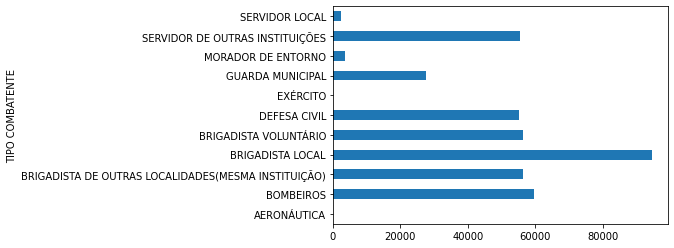

In [50]:
df.groupby(by='TIPO COMBATENTE').size( ).plot.barh()

(array([2.77214975e-02, 1.16467054e-02, 9.14024731e-03, 2.24959308e-04,
        3.07719716e-06, 8.97456454e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.95561548e-03]),
 array([  1.,  16.,  31.,  46.,  61.,  76.,  91., 106., 121., 136., 151.]),
 <a list of 10 Patch objects>)

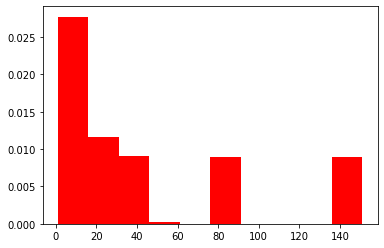

In [51]:
plt.hist(df['QTD COMBATENTE'], density=True, color='red')

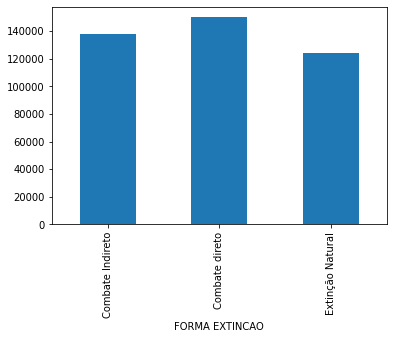

In [52]:
# Como o fogo foi apagado
df.groupby(by='FORMA EXTINCAO').size().plot.bar()

In [53]:
df.groupby(by='PROVAVEL CAUSA').size()

PROVAVEL CAUSA
CABO DE ALTA TENSÃO                   134
CAÇA                                 2667
CONFECÇÃO DE ACEIRO                   613
DESCARGA ELÉTRICA DE RAIO             129
EXTRAÇÃO DE ESPÉCIE VEGETAL             5
EXTRAÇÃO DE MADEIRA                    82
EXTRAÇÃO DE MEL                       234
FAGULHA DE MÁQUINAS                   126
FAGULHA TRANSPORTADA PELO VENTO       905
FOGOS DE ARTIFICIO                     17
FOGUEIRA DE ACAMPAMENTO                54
INDETERMINADO                      372049
LIMPEZA DE ÁREA PARA CULTIVO         2926
LIMPEZA DE ÁREA PARA MINERAÇÃO         58
LITÍGIO COM ORGÃO AMBIENTAL            11
PESSOA COM DEFICIÊNCIA MENTAL          17
QUEDA DE BALÃO                         15
QUEIMA DE CANA-DE-AÇUCAR               18
QUEIMA DE LIXO                       1463
QUEIMA DE RESTOS DE EXPLORAÇÃO        206
REIGNIÇÃO                            1257
RENOVAÇÃO DE PASTAGEM NATURAL       15081
RENOVAÇÃO DE PASTAGEM PLANTADA       3508
RITUAL RELIGIOSO   

In [54]:
df.groupby(by='VEGETACAO ATINGIDA').size()

VEGETACAO ATINGIDA
BREJO, VÁRZEA OU VEREDA             5862
FLORESTA CULTIVADA                  1569
MATA OU FLORESTA NATIVA           191335
PASTAGEM CULTIVADA                   931
PASTAGEM NATIVA OU CAMPO LIMPO     12261
VEGETAÇÃO ARBUSTIVA               191437
ÁREA DEGRADADA OU CAPOEIRA          7493
dtype: int64

In [55]:
df.groupby(by='TIPO AREA').size()

TIPO AREA
Outras Áreas       12617
Área Protegida    399114
dtype: int64

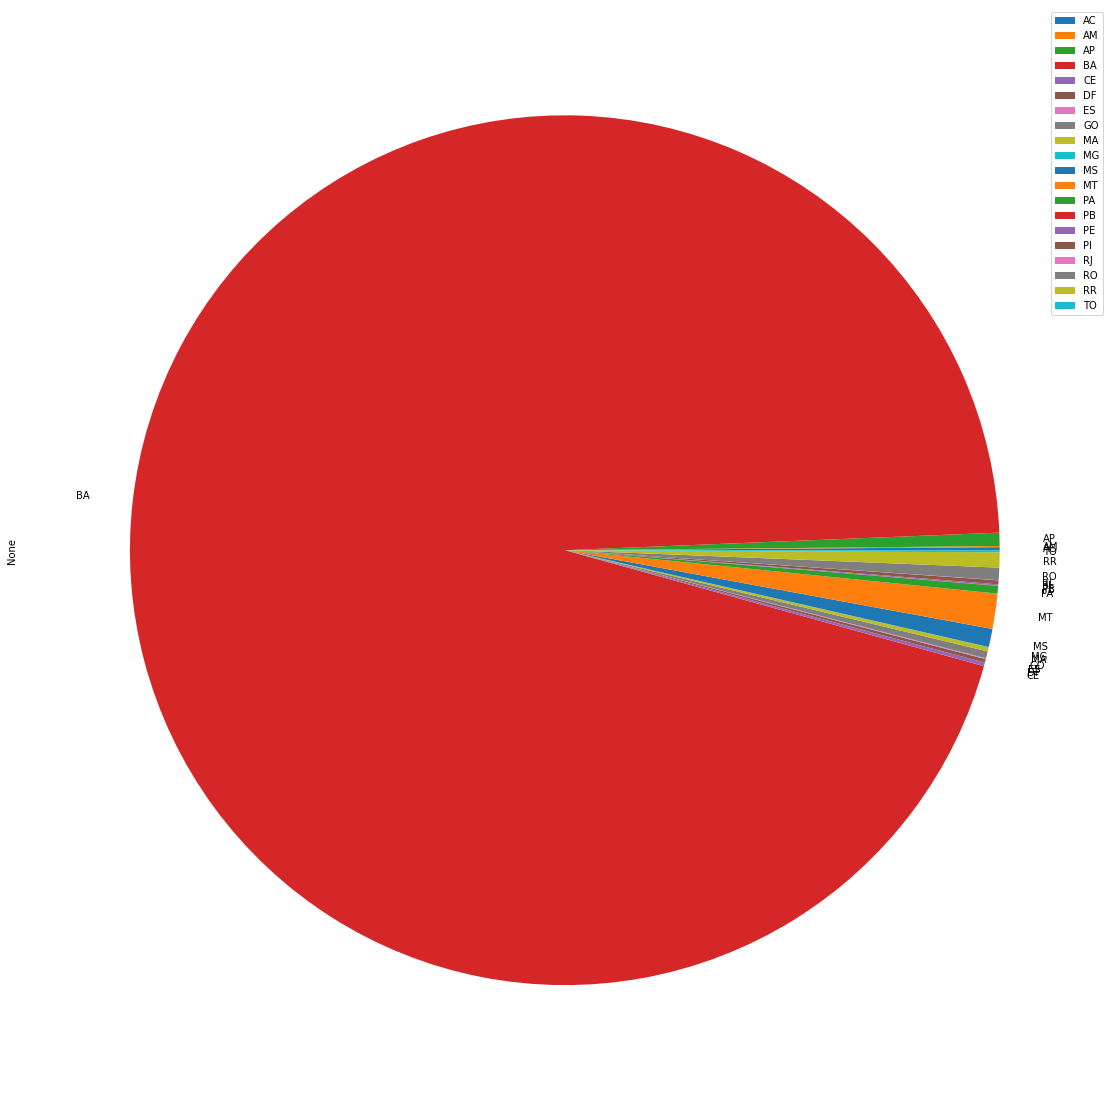

In [56]:
df.groupby(by="UF").size().plot.pie(figsize=(30,20) , legend = True, xlabel =  "Incêndios por UF" )

# Manipulanto datas

In [57]:
df['TEMPO PROCESSAMENTO'] = (df['DATA/HORA DETECCAO'] - df['DATA/HORA INICIO FOGO'])
df['EXTINCAO DO FOGO'] = (df['DATA/HORA EXTINCAO INCENDIO']- df['DATA/HORA INICIO FOGO']).dt.days
df.sample(2)

,SEQ OCORRENCIA INCENDIO,NIVEL ACIONAMENTO,TIPO LOCALIDADE,LOCALIDADE,UF,MUNICIPIO,TIPO DETECCAO,DATA/HORA INICIO FOGO,DATA/HORA DETECCAO,DATA/HORA DESLOCAMENTO,DATA/HORA PRIMEIRO ATAQUE,DATA/HORA REFORCO,DATA/HORA CONTROLE INCENDIO,DATA/HORA EXTINCAO INCENDIO,FORMA EXTINCAO,PERICIA,ANEXO,TIPO COMBATENTE,QTD COMBATENTE,ABORDAGEM,OUTROS PARTICIPANTES,QTD BRIGADISTA,UNIDADE IBAMA BRIGADA,FERRAMENTA,QTD AEREO,UNIDADE IBAMA INCENDIO,TIPO ITEM,PROVAVEL CAUSA,VEGETACAO ATINGIDA,TIPO AREA,DENTRO ENTORNO,QTD AREA ATINGIDA,METODO CALCULO,DIFICULDADE ENCONTRADA,TEMPO PROCESSAMENTO,EXTINCAO DO FOGO
153816,23069,Nível 2,UNIDADE DE CONSERVAÇÃO,PARNA DA CHAPADA DIAMANTINA,BA,ANDARAI,PONTO DE OBSERVAÇÃO,2020-10-06 08:10:00,2020-10-06 08:10:00,2020-10-06 08:10:00,2020-10-06 09:10:00,2020-10-06 09:10:00,2020-10-11 09:10:00,2020-10-12 18:10:00,Combate Indireto,Sim,23484.0,SERVIDOR DE OUTRAS INSTITUIÇÕES,89.0,Extinção,Brigada Voluntária de Abaíra - BVA,6.0,ORGANIZAÇÃO DA SOCIEDADE CIVIL,Helicóptero,1.0,BATALHÃO DE POLÍCIA MILITAR DE OPERAÇÕES AÉREA...,OUTRAS CAUSAS,INDETERMINADO,VEGETAÇÃO ARBUSTIVA,Área Protegida,Entorno,"2970,46",Imagem de Satélite,NaN,0 days,6
202010,23069,Nível 2,UNIDADE DE CONSERVAÇÃO,PARNA DA CHAPADA DIAMANTINA,BA,ANDARAI,PONTO DE OBSERVAÇÃO,2020-10-06 08:10:00,2020-10-06 08:10:00,2020-10-06 08:10:00,2020-10-06 09:10:00,2020-10-06 09:10:00,2020-10-11 09:10:00,2020-10-12 18:10:00,Combate Indireto,Sim,23484.0,BRIGADISTA DE OUTRAS LOCALIDADES(MESMA INSTITU...,1.0,Controle,Brigada de Resgate Ambiental de Lençóis - BRAL,14.0,ORGANIZAÇÃO DA SOCIEDADE CIVIL,Helicóptero,1.0,BATALHÃO DE POLÍCIA MILITAR DE OPERAÇÕES AÉREA...,OUTRAS CAUSAS,INDETERMINADO,MATA OU FLORESTA NATIVA,Área Protegida,Dentro,"400,85",Imagem de Satélite,NaN,0 days,6


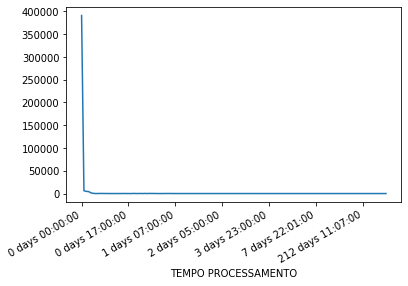

In [58]:
df.groupby(by='TEMPO PROCESSAMENTO').size().plot()

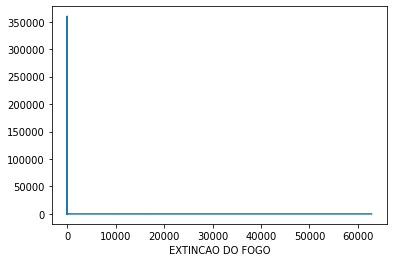

In [59]:
df.groupby(by='EXTINCAO DO FOGO').size().plot()

In [60]:
df['EXTINCAO DO FOGO'].min()

0

In [61]:
df['EXTINCAO DO FOGO'].max()

62821

In [62]:
df['EXTINCAO DO FOGO'].mean()

9.733110721499987

In [63]:
df['EXTINCAO DO FOGO'].describe()

count    412377.000000
mean          9.733111
std         374.836560
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max       62821.000000
Name: EXTINCAO DO FOGO, dtype: float64

deve-se apagar os dados minimo e máximo desta tabela para acabar com esse desvio

In [64]:
df[df['EXTINCAO DO FOGO'] > 100]

,SEQ OCORRENCIA INCENDIO,NIVEL ACIONAMENTO,TIPO LOCALIDADE,LOCALIDADE,UF,MUNICIPIO,TIPO DETECCAO,DATA/HORA INICIO FOGO,DATA/HORA DETECCAO,DATA/HORA DESLOCAMENTO,DATA/HORA PRIMEIRO ATAQUE,DATA/HORA REFORCO,DATA/HORA CONTROLE INCENDIO,DATA/HORA EXTINCAO INCENDIO,FORMA EXTINCAO,PERICIA,ANEXO,TIPO COMBATENTE,QTD COMBATENTE,ABORDAGEM,OUTROS PARTICIPANTES,QTD BRIGADISTA,UNIDADE IBAMA BRIGADA,FERRAMENTA,QTD AEREO,UNIDADE IBAMA INCENDIO,TIPO ITEM,PROVAVEL CAUSA,VEGETACAO ATINGIDA,TIPO AREA,DENTRO ENTORNO,QTD AREA ATINGIDA,METODO CALCULO,DIFICULDADE ENCONTRADA,TEMPO PROCESSAMENTO,EXTINCAO DO FOGO
5594,2141,Nível 1,TERRA INDÍGENA,MALACACHETA,RR,CANTA,RONDA,2016-01-27 10:01:00,2016-01-27 10:01:00,2016-01-27 10:01:00,2016-01-27 11:01:00,NaT,2016-06-27 16:06:00,2016-06-27 18:06:00,Combate direto,Não,NaN,BRIGADISTA LOCAL,8.0,Extinção,NaN,NaN,NaN,NaN,NaN,NaN,ACIDENTE,FAGULHA TRANSPORTADA PELO VENTO,PASTAGEM NATIVA OU CAMPO LIMPO,Área Protegida,Dentro,20,Estimativa Visual,DIFÍCIL ACESSO MATA MUITO FECHADA E PALMEIRAS ...,0 days 00:00:00,152
5713,12701,Nível 1,PROPRIEDADE RURAL,P.A Joana D'arc,RO,PORTO VELHO,RONDA,2010-09-10 15:09:00,2014-09-10 18:09:00,2017-09-11 09:09:00,2017-09-11 09:09:00,NaT,2017-09-11 10:09:00,2017-09-11 20:09:00,Combate Indireto,Não,NaN,BRIGADISTA LOCAL,4.0,1º Ataque,NaN,NaN,NaN,NaN,NaN,NaN,OUTRAS CAUSAS,VANDALISMO,ÁREA DEGRADADA OU CAPOEIRA,Outras Áreas,NaN,"0,45",Estimativa Visual,NaN,1461 days 03:00:00,2558
5732,3423,Nível 1,TERRA INDÍGENA,COROA VERMELHA,BA,PORTO SEGURO,RONDA,2015-12-06 14:12:00,2015-12-06 14:12:00,NaT,2015-12-06 14:12:00,NaT,2015-12-06 21:12:00,2052-12-06 23:12:00,Combate direto,Não,NaN,BRIGADISTA LOCAL,7.0,Controle,NaN,NaN,NaN,NaN,NaN,NaN,OUTRAS CAUSAS,INDETERMINADO,ÁREA DEGRADADA OU CAPOEIRA,Área Protegida,NaN,NaN,NaN,NaN,0 days 00:00:00,13515
5733,3423,Nível 1,TERRA INDÍGENA,COROA VERMELHA,BA,PORTO SEGURO,RONDA,2015-12-06 14:12:00,2015-12-06 14:12:00,NaT,2015-12-06 14:12:00,NaT,2015-12-06 21:12:00,2052-12-06 23:12:00,Combate Indireto,Não,NaN,BRIGADISTA LOCAL,7.0,Controle,NaN,NaN,NaN,NaN,NaN,NaN,OUTRAS CAUSAS,INDETERMINADO,ÁREA DEGRADADA OU CAPOEIRA,Área Protegida,NaN,NaN,NaN,NaN,0 days 00:00:00,13515
5932,12822,Nível 1,UNIDADE DE CONSERVAÇÃO,PARNA DE BRASÍLIA,DF,BRASILIA,TELEFONE,2016-09-18 19:09:00,2017-09-18 19:09:00,2017-09-18 19:09:00,2017-09-18 20:09:00,NaT,2017-09-18 23:09:00,2017-09-19 18:09:00,Combate direto,Não,NaN,BRIGADISTA VOLUNTÁRIO,5.0,Extinção,PRONTO EMPREGO DE BRASÍLIA- DF,2.0,CENTRO ESPECIALIZADO PREVFOGO,NaN,NaN,NaN,OUTRAS CAUSAS,VANDALISMO,VEGETAÇÃO ARBUSTIVA,Área Protegida,Dentro,NaN,Imagem de Satélite,NaN,365 days 00:00:00,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409672,12822,Nível 1,UNIDADE DE CONSERVAÇÃO,PARNA DE BRASÍLIA,DF,BRASILIA,TELEFONE,2016-09-18 19:09:00,2017-09-18 19:09:00,2017-09-18 19:09:00,2017-09-18 20:09:00,NaT,2017-09-18 23:09:00,2017-09-19 18:09:00,Combate direto,Não,NaN,BRIGADISTA LOCAL,6.0,1º Ataque,PRONTO EMPREGO DE BRASÍLIA- DF,2.0,CENTRO ESPECIALIZADO PREVFOGO,NaN,NaN,NaN,OUTRAS CAUSAS,VANDALISMO,PASTAGEM NATIVA OU CAMPO LIMPO,Área Protegida,Dentro,NaN,Imagem de Satélite,NaN,365 days 00:00:00,365
416451,20006,Nível 1,TERRA INDÍGENA,KADIWÉU II,MS,PORTO MURTINHO,PONTO DE OBSERVAÇÃO,2019-02-14 02:02:00,2019-09-14 13:09:00,2019-09-15 07:09:00,2019-09-15 08:09:00,NaT,2019-09-15 15:09:00,2019-09-16 00:09:00,Combate direto,Não,NaN,BRIGADISTA LOCAL,8.0,1º Ataque,NaN,NaN,NaN,NaN,NaN,NaN,OUTRAS CAUSAS,VANDALISMO,MATA OU FLORESTA NATIVA,Área Protegida,Dentro,400,Estimativa Visual,difícil acesso valas e buracos.,212 days 11:07:00,213
416758,12822,Nível 1,UNIDADE DE CONSERVAÇÃO,PARNA DE BRASÍLIA,DF,BRASILIA,TELEFONE,2016-09-18 19:09:00,2017-09-18 19:09:00,2017-09-18 19:09:00,2017-09-18 20:09:00,NaT,2017-09-18 23:09:00,2017-09-19 18:09:00,Combate direto,Não,NaN,SERVIDOR LOCAL,2.0,Extinção,PRONTO EMPREGO DE BRASÍLIA- DF,2.0,CENTRO ESPECIALIZADO PREVFOGO,NaN,N

Como podemos perceber há 141 outliers devido a erro de digitação, que precisaria ter um tratamento específico em cada linha para arrumar.

(2015.0, 2021.0)

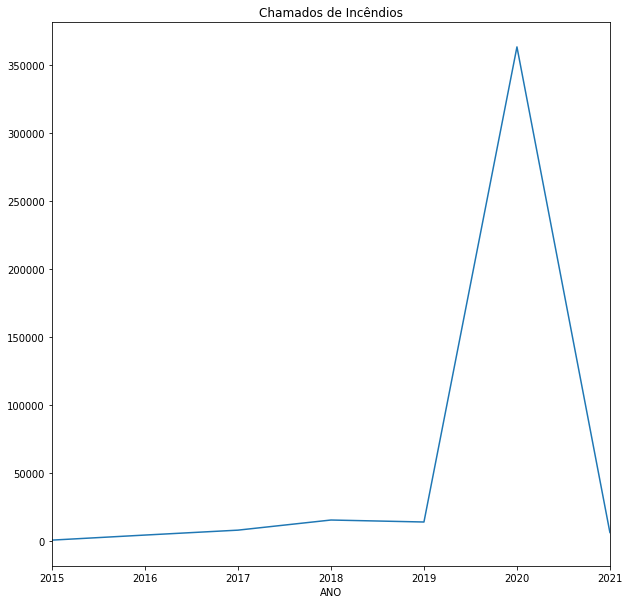

In [88]:
# Por último verificamos a evolução dos desmatamentos criando uma nova coluna ano
df["ANO"] = df['DATA/HORA INICIO FOGO'].dt.year
df.groupby(df['ANO']).size().plot(title = "Chamados de Incêndios", figsize= (10,10))
plt.xlim(2015,2021)

Podemos ver que houve um aumento abrupto de chamadas no ano de 2020